<a href="https://colab.research.google.com/github/Nasreen69/ML/blob/main/CAB_BOOKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Objective : combine historical usage pattern along with open data sources like weather data to forecast cab demand in city* 

*exploiting an understanding of cab supply and demand could increase quality of the service and enhance user experience*

*1. Import the required libraries and load the training and testing dataset*

In [ ]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import seaborn as sn  
import seaborn as sns
import seaborn as sb
import scipy.stats as stats

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,mean_squared_log_error,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
df1=pd.read_csv('train.csv')
df11=pd.read_csv('train_label.csv', header=None, names=['Total_Booking'])
train = pd.concat([df1, df11], axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
df2=pd.read_csv('test.csv')
df22=pd.read_csv('test_label.csv', header=None, names=['Total_Booking'])
test = pd.concat([df2, df22], axis=1)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


*2. Analyze the dataset and write your observations*

*a. Check the shape of the training and testing set* 

*b. Print the data types of each column* 

*c. Check the missing values present in the dataset*

In [ ]:
print(train.shape)
print(test.shape)

(8708, 10)
(2178, 10)


In [ ]:
train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_Booking      int64
dtype: object

In [ ]:
test.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_Booking      int64
dtype: object

In [ ]:
train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

In [ ]:
test.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64

#***Perform Feature Engineering***

*a. Create new columns date, hour, weekDay, month from datetime column*

In [ ]:
train['date'] = train.datetime.apply(lambda x : x.split()[0])
train['hour'] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"] = train.datetime.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y %H:%M").weekday()])
train["month"] = train.datetime.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y %H:%M").month])

In [ ]:
test['date'] = test.datetime.apply(lambda x : x.split()[0])
test['hour'] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["weekday"] = test.datetime.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y %H:%M").weekday()])
test["month"] = test.datetime.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y %H:%M").month])

*b. Coerce the datatype of season, holiday, workingday, and weather to category* 

In [ ]:
category = ["season","holiday", "workingday","weather"]
for var in category:
  train[var] = train[var].astype('category')
  test[var] = test[var].astype('category')

In [ ]:
train.dtypes.value_counts()

object      5
float64     3
int64       2
category    2
category    1
category    1
dtype: int64

In [ ]:
test.dtypes.value_counts()

object      5
float64     3
category    2
int64       2
category    1
category    1
dtype: int64

*c. Dropping the datetime column as we have already extracted useful features from it* 

In [ ]:
train = train.drop(['datetime'],axis=1)
test = test.drop(['datetime'],axis=1)

In [ ]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_Booking', 'date', 'hour', 'weekday',
       'month'],
      dtype='object')

In [ ]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_Booking', 'date', 'hour', 'weekday',
       'month'],
      dtype='object')

In [ ]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September


In [ ]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,5/10/2012,11,Thursday,May
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,6/9/2012,7,Saturday,June
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,3/6/2011,20,Sunday,March
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,10/13/2011,11,Thursday,October
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,6/2/2012,12,Saturday,June


*Missing value Analysis*

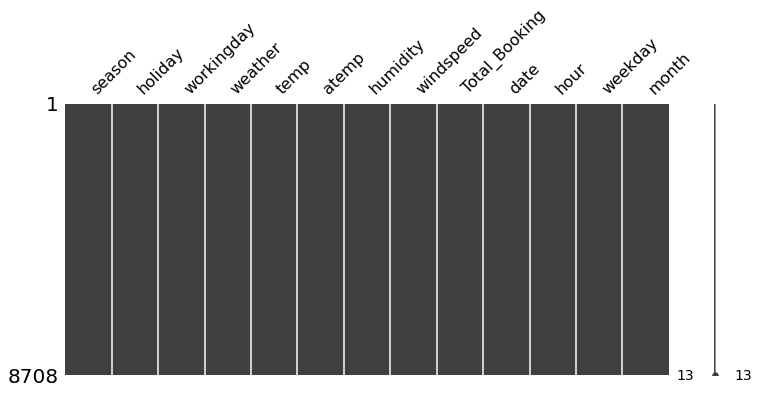

In [ ]:
# Skewness in the data
msno.matrix(train,figsize=(12,5))

## ***perform outlier Analysis***

*a. Plot Box plots across various features like season, hour of the day, working, etc. to see if there are any Outlier and note down your inference*

*b. Remove the outliers present in the dataset*

[Text(0, 0.5, 'Total_booking'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Total booking for working day')]

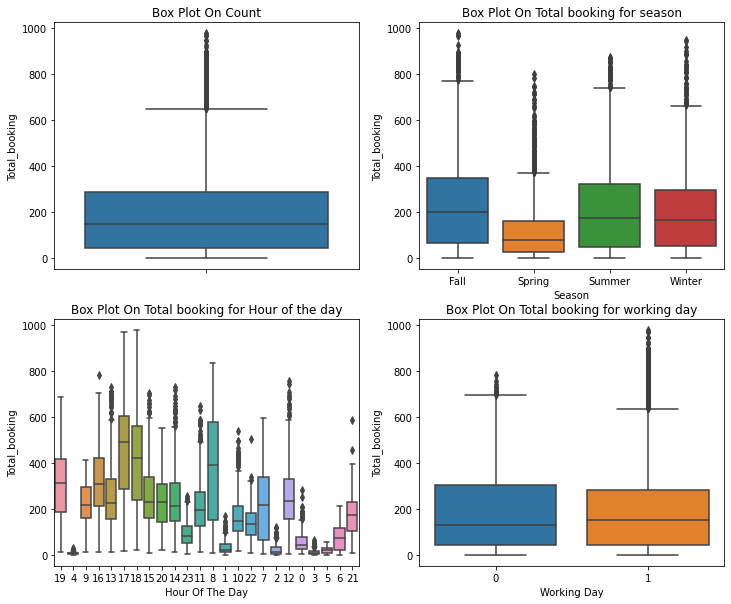

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sn.set_style("whitegrid")
sn.boxplot(data=train, y ="Total_Booking", orient ="v", ax=axes[0][0])
sn.boxplot(data=train, y = "Total_Booking",x = "season", orient ="v",ax=axes[0][1])
sn.boxplot(data=train, y = "Total_Booking",x = "hour", orient ="v", ax=axes[1][0])
sn.boxplot(data=train, y = "Total_Booking",x = "workingday", orient ="v", ax=axes[1][1])

axes[0][0].set(ylabel = 'Total_booking', title="Box Plot On Count")
axes[0][1].set(xlabel = 'Season', ylabel = 'Total_booking', title="Box Plot On Total booking for season")
axes[1][0].set(xlabel = 'Hour Of The Day', ylabel = 'Total_booking', title="Box Plot On Total booking for Hour of the day")
axes[1][1].set(xlabel = 'Working Day', ylabel = 'Total_booking', title="Box Plot On Total booking for working day")



*  in first fig, Outliers are on higher side. No outlier on the lower range of Total booking data.
*   We can see low bookings in spring season, which is clearly visible in the dip in the median value in boxplot
*   Two specific times in the hour of the day plot where the median value are high. The value is between 7-8 AM and 5-6 PM. It may be due to the start /end of the day (office, school, business, etc)
*   In Working day plot, the outliers seems more on working day than non working day.

In [ ]:
train.describe()

,temp,atemp,humidity,windspeed,Total_Booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,20.243020,23.655552,61.649173,12.843891,193.007005
std,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.820000,0.760000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,46.000000,7.001500,43.000000
50%,20.500000,24.240000,61.000000,12.998000,148.000000
75%,26.240000,31.060000,77.000000,16.997900,286.000000
max,41.000000,45.455000,100.000000,56.996900,977.000000


Perform Correlation Analysis:                                                                                           
a. Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity", 
"windspeed"] 

b. Write down your inference in the markdown cell 

In [ ]:
z_score= (train['Total_Booking'] - train['Total_Booking'].mean()) / train['Total_Booking'].std()

In [ ]:
new_train = train[(z_score < 3) & (z_score > -3)]
new_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September


In [ ]:
print("shape of the datset before removing outliers: ", train.shape)
print("shape of the datset after removing outliers: ", new_train.shape)

shape of the datset before removing outliers:  (8708, 13)
shape of the datset after removing outliers:  (8591, 13)


In [ ]:
new_train[["temp","atemp","humidity","windspeed",'Total_Booking']].corr()

,temp,atemp,humidity,windspeed,Total_Booking
temp,1.000000,0.984432,-0.057551,-0.028565,0.387713
atemp,0.984432,1.000000,-0.035908,-0.069875,0.383820
humidity,-0.057551,-0.035908,1.000000,-0.322723,-0.305836
windspeed,-0.028565,-0.069875,-0.322723,1.000000,0.098792
Total_Booking,0.387713,0.383820,-0.305836,0.098792,1.000000


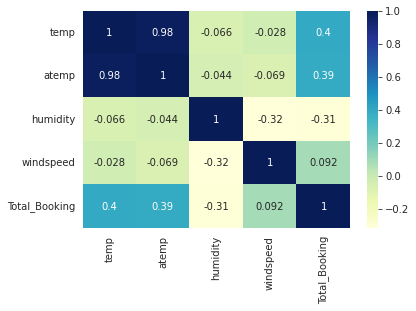

In [ ]:
# plotting correlation heatmap
dataplot = sb.heatmap(train.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

atemp and temp shows strong co-relation .98. Any one of them can be dropped as they are showing strong multicolinearity.

Humidity shows negative with respect to booking, somehow bookings are dependent on humidity

temp shows positive correlation with bookings. Booking still has dependency on temp.

windspeed has very nominal influence on bookings, this variable may not impact bookings.

### ***Perform Data Visualization:***                                                                                             
a. Visualize distribution of data: total column and plot the probability 
distribution plot for the column as well  
b. Visualize total vs (Month, Season, Hour, Weekday, Usertype) 

c. Use Histograms to plot all the continuous variables present in the data

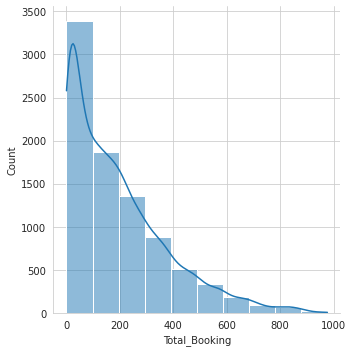

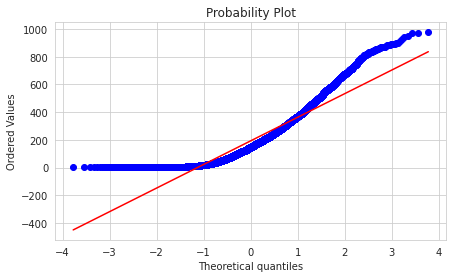

In [ ]:
sns.displot(train['Total_Booking'], bins = 10, kde= True)

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1, 1,1)
ax.set_title("Probplot")
stats.probplot(train['Total_Booking'], dist='norm', plot = ax)
plt.show()

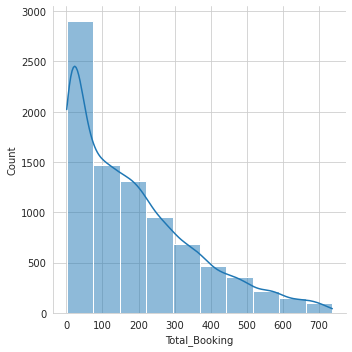

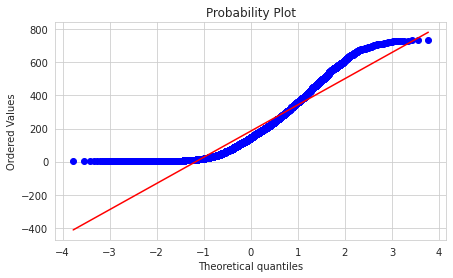

In [ ]:
sns.displot(new_train['Total_Booking'], bins = 10, kde= True)

fig3 = plt.figure(figsize=(7, 4))
ax3 = fig3.add_subplot(1, 1,1)
ax3.set_title("Probplot")
stats.probplot(new_train['Total_Booking'], dist='norm', plot = ax3)
plt.show()

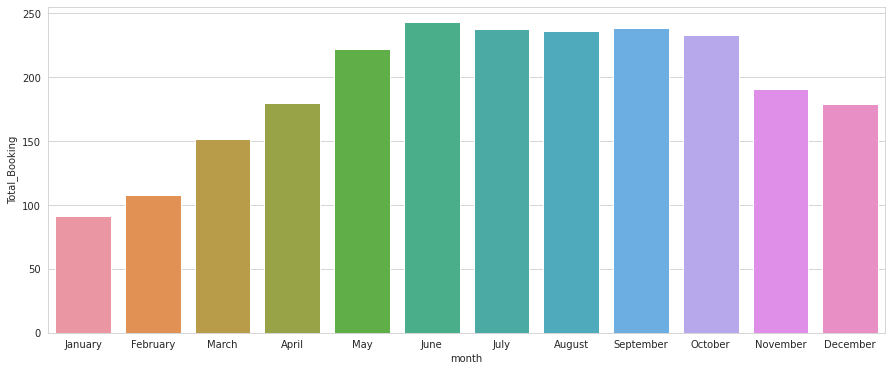

In [ ]:
fig, (ax1) = plt.subplots(nrows=1)
fig.set_size_inches(15,6)
sortorder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueorder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(train.groupby("month")["Total_Booking"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="Total_Booking", ascending=False)
sn.barplot(data=monthSorted, x="month", y="Total_Booking", ax=ax1,order=sortorder)

[Text(17.200000000000003, 0.5, 'users Total_Booking'),
 Text(0.5, 17.200000000000003, 'Hour of the day'),
 Text(0.5, 1.0, 'Average users Total_booking By hour of the daya across weekday')]

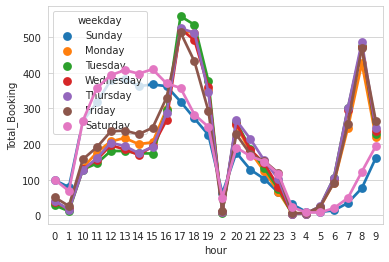

In [ ]:
fig, (ax2) = plt.subplots(nrows=1)
hourAggregated = pd.DataFrame(train.groupby(["hour", "weekday"],sort=True)['Total_Booking'].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["Total_Booking"], hue=hourAggregated['weekday'], hue_order=hueorder, data=hourAggregated)
ax3.set(xlabel='Hour of the day', ylabel='users Total_Booking', title="Average users Total_booking By hour of the daya across weekday")


[Text(18.106250000000003, 0.5, 'users Total_Booking'),
 Text(0.5, 17.200000000000003, 'Hour of the day'),
 Text(0.5, 1.0, 'Average users Total_booking By hour of the daya across season')]

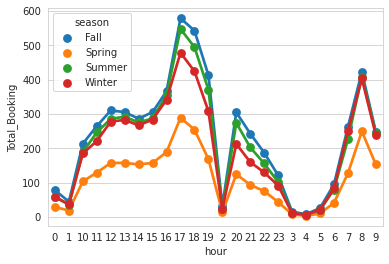

In [ ]:
fig, (ax3) = plt.subplots(nrows=1)
hourAggregated = pd.DataFrame(train.groupby(["hour", "season"],sort=True)['Total_Booking'].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["Total_Booking"], hue=hourAggregated['season'], data=hourAggregated)
ax2.set(xlabel='Hour of the day', ylabel='users Total_Booking', title="Average users Total_booking By hour of the daya across season")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3266dcb50>,
      dtype=object)

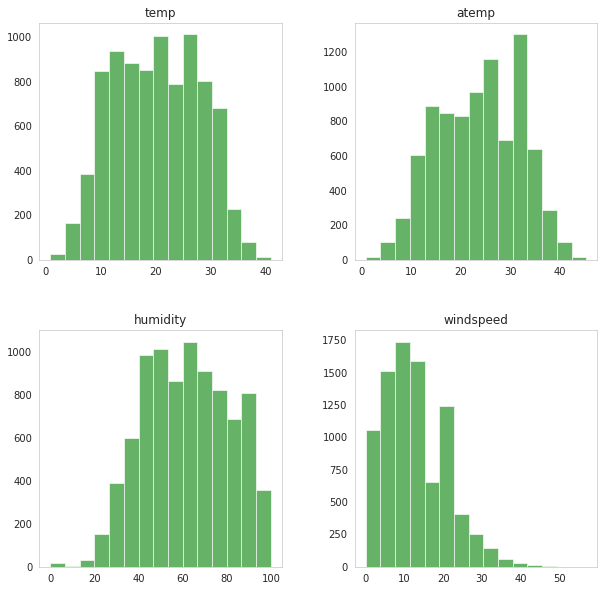

In [ ]:
train[['temp','atemp','humidity','windspeed']].hist(bins=15, figsize=(10,10), alpha=0.6, grid=False, rwidth=2, color='green')

### *Convert the categorical variables into one hot vector*   

In [ ]:
df = pd.get_dummies(new_train)
df.head()

,temp,atemp,humidity,windspeed,Total_Booking,season_Fall,season_Spring,season_Summer,season_Winter,holiday_0,holiday_1,workingday_0,workingday_1,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,date_1/1/2011,date_1/1/2012,date_1/10/2011,date_1/10/2012,date_1/11/2011,date_1/11/2012,date_1/12/2011,date_1/12/2012,date_1/13/2011,date_1/13/2012,date_1/14/2011,date_1/14/2012,date_1/15/2011,date_1/15/2012,date_1/16/2011,date_1/16/2012,date_1/17/2011,date_1/17/2012,date_1/18/2011,date_1/18/2012,date_1/19/2011,date_1/19/2012,date_1/2/2011,...,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_2,hour_20,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,22.14,25.760,77,16.9979,504,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,28.70,33.335,79,19.0012,5,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,5.74,6.060,50,22.0028,139,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,13.94,16.665,29,8.9981,209,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,30.34,33.335,51,19.0012,184,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(new_train.shape)
print(df.shape)

(8591, 13)
(8591, 516)


***Splitting dataset for training and testing***

In [ ]:
x = df.drop('Total_Booking', axis=1)
y = df['Total_Booking']

print(x,y)

       temp   atemp  humidity  ...  month_November  month_October  month_September
0     22.14  25.760        77  ...               0              0                0
1     28.70  33.335        79  ...               0              0                1
2      5.74   6.060        50  ...               0              0                0
3     13.94  16.665        29  ...               1              0                0
4     30.34  33.335        51  ...               0              0                1
...     ...     ...       ...  ...             ...            ...              ...
8703   4.10   6.820        54  ...               0              0                0
8704  16.40  20.455        87  ...               1              0                0
8705  23.78  27.275        56  ...               0              0                0
8706  11.48  13.635        61  ...               1              0                0
8707   5.74   6.060        50  ...               0              0                0

[85

In [ ]:
print(x.shape)
print(y.shape)

(8591, 515)
(8591,)


In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
print(train_x.head())
print(train_y.head())

       temp   atemp  humidity  ...  month_November  month_October  month_September
6024  26.24  30.305        65  ...               0              0                0
815   16.40  20.455        82  ...               0              0                0
2960  10.66  12.120        60  ...               0              0                0
5390  14.76  18.940        50  ...               0              0                0
4882  22.14  25.760        45  ...               0              0                0

[5 rows x 515 columns]
6024     20
815     406
2960     90
5390    358
4882    113
Name: Total_Booking, dtype: int64


***Fitting various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor,SVR,and K-Neighbors Regressor)*** 

***RandomForestRegressor***

In [ ]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 0)
rf.fit(train_x, train_y)
y_pred_train = rf.predict(train_x)
y_pred_test = rf.predict(test_x)

mse=np.mean((train_y-y_pred_train)**2)
rmse_RF = np.round(np.sqrt(mse),3)
rmse_RF

26.862

***Ada Boost Regressor***

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(random_state=0, n_estimators=100)
abr.fit(train_x,train_y)
y_pred_train = abr.predict(train_x)

mse=np.mean((train_y-y_pred_train)**2)
rmse_adr = np.round(np.sqrt(mse),3)
rmse_adr

135.694

***Bagging Regressor***

In [ ]:
br = BaggingRegressor(n_estimators=100,random_state=0, )
br.fit(train_x,train_y)
y_pred_train = br.predict(train_x)

mse=np.mean((train_y-y_pred_train)**2)
rmse_br = np.round(np.sqrt(mse),3)
rmse_br

26.104

***SVR***

In [ ]:
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(train_x,train_y)
y_pred_train = svr.predict(train_x)

mse=np.mean((train_y-y_pred_train)**2)
rmse_SVR = np.round(np.sqrt(mse),3)
rmse_SVR

168.067

***K-Neighbors Regressor***

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=11)
KNN.fit(train_x,train_y)
y_pred_train = KNN.predict(train_x)
y_pred_test = KNN.predict(train_x)

mse=np.mean((train_y-y_pred_train)**2)
rmse_KNN = np.round(np.sqrt(mse),3)
rmse_KNN

130.978

***Displaying a Factor plot to visualize the RMSE values achieved by different modeling algorithm*** 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


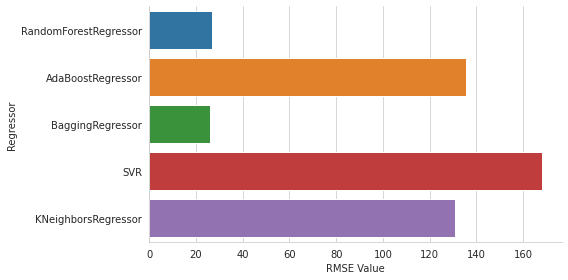

In [ ]:
Models = [rmse_RF,rmse_adr,rmse_br,rmse_SVR,rmse_KNN]
rms_df =pd.DataFrame(Models, columns=['RMSE Value'])
rms_df['Regressor'] =['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rms_df

sns.factorplot(y='Regressor', x='RMSE Value',data=rms_df,kind='bar',size=4,aspect=2)

***Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_***

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid  
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30,40,],
    'n_estimators': [300, 500]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(test_x, test_y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'n_estimators': [300, 500]},
             verbose=2)

***Perform prediction on the test set and print the mean***

In [ ]:
y_pred_test = grid_search.predict(test_x)
mean_squared_log_error(test_y, y_pred_test)

0.19713252712172816